In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
cancer = pd.read_csv(r'C:\Users\Metehan Sevgil\Desktop\KODLAR\Phyton\derin_proje\_cancer_dataset_uae.csv')

cancer.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


In [3]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

In [4]:
def build_model(input_dim):
    model = Sequential([
    Dense(512, activation='relu', input_shape=input_dim),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(3, activation='softmax')])

    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

In [5]:
cancer_clean_first = cancer.drop(['Patient_ID', 'Death_Date', 'Cause_of_Death',
                            'Diagnosis_Date', 'Treatment_Start_Date',
                            'Primary_Physician', 'Emirate', 'Ethnicity',
                            'Gender', 'Nationality', 'Hospital'], axis=1)

cancer_clean_first['Comorbidities'] = cancer_clean_first.groupby(['Smoking_Status', 'Outcome'])['Comorbidities'].transform(lambda x: x.fillna(x.mode()[0]))
cancer_clean_first.head()

,Age,Cancer_Type,Cancer_Stage,Treatment_Type,Outcome,Smoking_Status,Comorbidities,Weight,Height
0,69,Liver,II,Radiation,Recovered,Non-Smoker,Hypertension,61,157
1,32,Leukemia,III,Surgery,Recovered,Smoker,Hypertension,80,175
2,89,Liver,III,Radiation,Under Treatment,Non-Smoker,Hypertension,50,175
3,78,Lung,III,Radiation,Recovered,Former Smoker,Hypertension,44,155
4,38,Pancreatic,II,Chemotherapy,Recovered,Former Smoker,Hypertension,101,160


In [6]:
numeric_columns = ['Age', 'Weight', 'Height']

scaler = StandardScaler()

cancer_clean_first[numeric_columns] = scaler.fit_transform(cancer_clean_first[numeric_columns])

categorical_cols = cancer_clean_first.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    cancer_clean_first[col] = label_encoder.fit_transform(cancer_clean_first[col])

cancer_clean_first.head()

,Age,Cancer_Type,Cancer_Stage,Treatment_Type,Outcome,Smoking_Status,Comorbidities,Weight,Height
0,0.744849,3,1,2,1,1,2,-0.572573,-1.226214
1,-1.037743,2,2,3,1,2,2,0.699812,0.561342
2,1.708413,3,2,2,2,1,2,-1.309217,0.561342
3,1.178453,4,2,2,1,0,2,-1.711022,-1.424831
4,-0.748674,6,1,0,1,0,2,2.106131,-0.928288


In [7]:
cancer_clean_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             10000 non-null  float64
 1   Cancer_Type     10000 non-null  int32  
 2   Cancer_Stage    10000 non-null  int32  
 3   Treatment_Type  10000 non-null  int32  
 4   Outcome         10000 non-null  int32  
 5   Smoking_Status  10000 non-null  int32  
 6   Comorbidities   10000 non-null  int32  
 7   Weight          10000 non-null  float64
 8   Height          10000 non-null  float64
dtypes: float64(3), int32(6)
memory usage: 468.9 KB


In [8]:
X_first = cancer_clean_first.drop('Outcome', axis=1)
y_first = cancer_clean_first['Outcome']

y_first.value_counts()

Outcome
1    4931
2    4077
0     992
Name: count, dtype: int64

In [9]:
y_first_cat = to_categorical(y_first, num_classes=3)

print(pd.Series(y_first).value_counts())

Outcome
1    4931
2    4077
0     992
Name: count, dtype: int64


In [10]:
X_train_first, X_test_first, y_train_first, y_test_first = train_test_split(X_first, y_first_cat, test_size=0.2, random_state=0, stratify=y_first_cat)

In [11]:
model_first = build_model(input_dim=(X_train_first.shape[1],))

In [12]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

In [13]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

In [14]:
def confusion_matrix_plot(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [15]:
history_first = model_first.fit(X_train_first,
                                y_train_first,
                                epochs=50,
                                batch_size=64,
                                validation_data=(X_test_first, y_test_first))

Epoch 1/50
125/125 [==============================] - 5s 17ms/step - loss: 1.2979 - accuracy: 0.3984 - val_loss: 0.9715 - val_accuracy: 0.4485
Epoch 2/50
125/125 [==============================] - 2s 16ms/step - loss: 1.0756 - accuracy: 0.4464 - val_loss: 0.9528 - val_accuracy: 0.4765
Epoch 3/50
125/125 [==============================] - 1s 11ms/step - loss: 1.0285 - accuracy: 0.4572 - val_loss: 0.9455 - val_accuracy: 0.4845
Epoch 4/50
125/125 [==============================] - 1s 11ms/step - loss: 0.9855 - accuracy: 0.4708 - val_loss: 0.9484 - val_accuracy: 0.4760
Epoch 5/50
125/125 [==============================] - 2s 12ms/step - loss: 0.9696 - accuracy: 0.4805 - val_loss: 0.9475 - val_accuracy: 0.4780
Epoch 6/50
125/125 [==============================] - 2s 13ms/step - loss: 0.9632 - accuracy: 0.4794 - val_loss: 0.9505 - val_accuracy: 0.4815
Epoch 7/50
125/125 [==============================] - 1s 11ms/step - loss: 0.9615 - accuracy: 0.4755 - val_loss: 0.9487 - val_accuracy: 0.4725

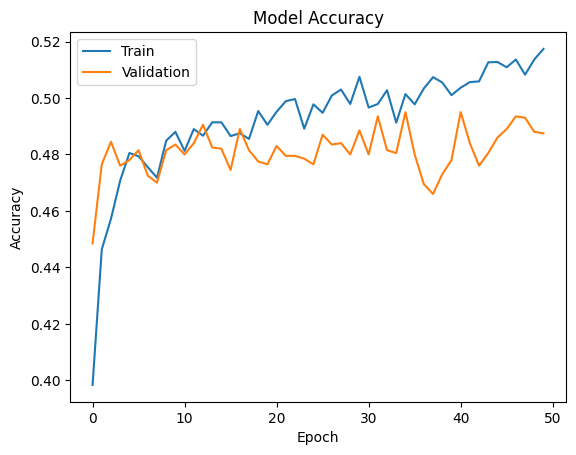

In [16]:
plot_accuracy(history_first)

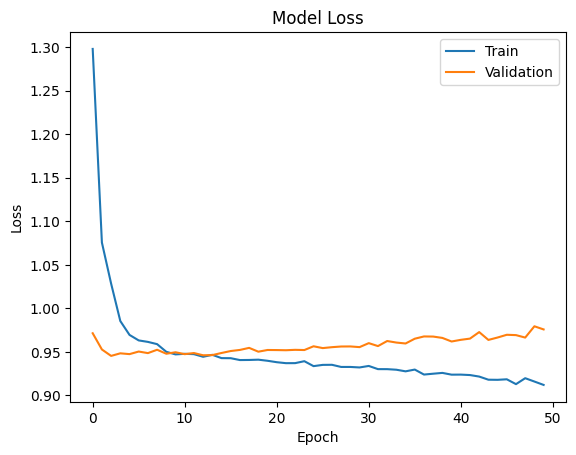

In [17]:
plot_loss(history_first)

In [18]:
loss, accuracy = model_first.evaluate(X_test_first, y_test_first)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

63/63 [==============================] - 0s 6ms/step - loss: 0.9758 - accuracy: 0.4875
Test Loss: 0.9758
Test Accuracy: 0.4875


In [19]:
y_pred_first = model_first.predict(X_test_first)
y_pred_classes_first = np.argmax(y_pred_first, axis=1)
y_true_first = np.argmax(y_test_first, axis=1)

63/63 [==============================] - 0s 3ms/step


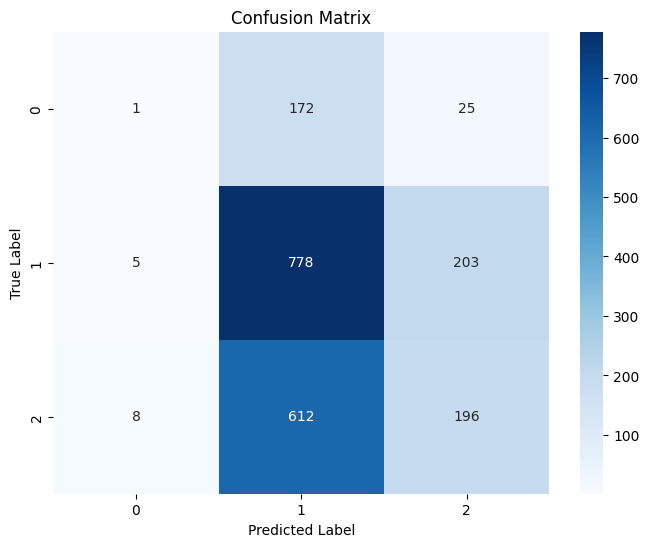

In [20]:
confusion_matrix_plot(y_true_first, y_pred_classes_first)

In [21]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

In [22]:
cancer_hf = cancer[['Smoking_Status', 'Weight', 'Height', 'Comorbidities', 'Outcome']].query("Comorbidities == Comorbidities")

cancer_hf['BMI'] = cancer_hf['Weight'] / ((cancer_hf['Height'] / 100) ** 2)
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

cancer_hf['BMI_Category'] = cancer_hf['BMI'].apply(bmi_category)

cancer_hf.head()

,Smoking_Status,Weight,Height,Comorbidities,Outcome,BMI,BMI_Category
5,Smoker,59,176,Hypertension,Recovered,19.047004,Normal
6,Non-Smoker,66,155,Hypertension,Recovered,27.471384,Overweight
10,Former Smoker,48,173,Cardiovascular Disease,Under Treatment,16.037956,Underweight
11,Smoker,71,160,Diabetes,Recovered,27.734375,Overweight
13,Non-Smoker,84,168,Hypertension,Under Treatment,29.761905,Overweight


In [23]:
cancer['Diagnosis_Date'] = pd.to_datetime(cancer['Diagnosis_Date'])
cancer['Treatment_Start_Date'] = pd.to_datetime(cancer['Treatment_Start_Date'])
cancer['Days_Between'] = (cancer['Treatment_Start_Date'] - cancer['Diagnosis_Date']).dt.days
cancer['BMI'] = cancer['Weight'] / ((cancer['Height'] / 100) ** 2)
cancer['BMI_Category'] = cancer['BMI'].apply(bmi_category)
cancer['ratio_age_bmi'] = cancer['BMI'] / cancer['Age']
cancer['Survived'] = cancer['Outcome'].apply(lambda x: 0 if x == 'Deceased' else 1)

In [24]:
cancer_clean = cancer.drop(['Patient_ID', 'Death_Date', 'Cause_of_Death',
                            'Diagnosis_Date', 'Treatment_Start_Date',
                            'Primary_Physician', 'Emirate', 'Ethnicity',
                            'Gender', 'Nationality', 'Hospital'], axis=1)

cancer_clean['Comorbidities'] = cancer_clean.groupby(['BMI_Category', 'Smoking_Status', 'Outcome'])['Comorbidities'].transform(lambda x: x.fillna(x.mode()[0]))
cancer_clean.head()

,Age,Cancer_Type,Cancer_Stage,Treatment_Type,Outcome,Smoking_Status,Comorbidities,Weight,Height,Days_Between,BMI,BMI_Category,ratio_age_bmi,Survived
0,69,Liver,II,Radiation,Recovered,Non-Smoker,Hypertension,61,157,4,24.747454,Normal,0.358659,1
1,32,Leukemia,III,Surgery,Recovered,Smoker,Hypertension,80,175,26,26.122449,Overweight,0.816327,1
2,89,Liver,III,Radiation,Under Treatment,Non-Smoker,Hypertension,50,175,171,16.326531,Underweight,0.183444,1
3,78,Lung,III,Radiation,Recovered,Former Smoker,Hypertension,44,155,37,18.314256,Underweight,0.234798,1
4,38,Pancreatic,II,Chemotherapy,Recovered,Former Smoker,Hypertension,101,160,88,39.453125,Obese,1.038240,1


In [25]:
cancer_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             10000 non-null  int64  
 1   Cancer_Type     10000 non-null  object 
 2   Cancer_Stage    10000 non-null  object 
 3   Treatment_Type  10000 non-null  object 
 4   Outcome         10000 non-null  object 
 5   Smoking_Status  10000 non-null  object 
 6   Comorbidities   10000 non-null  object 
 7   Weight          10000 non-null  int64  
 8   Height          10000 non-null  int64  
 9   Days_Between    10000 non-null  int64  
 10  BMI             10000 non-null  float64
 11  BMI_Category    10000 non-null  object 
 12  ratio_age_bmi   10000 non-null  float64
 13  Survived        10000 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


In [26]:
numeric_columns = ['Age', 'Weight', 'Height', 'Days_Between', 'BMI', 'ratio_age_bmi']

scaler = StandardScaler()

cancer_clean[numeric_columns] = scaler.fit_transform(cancer_clean[numeric_columns])

categorical_cols = cancer_clean.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    cancer_clean[col] = label_encoder.fit_transform(cancer_clean[col])

cancer_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             10000 non-null  float64
 1   Cancer_Type     10000 non-null  int32  
 2   Cancer_Stage    10000 non-null  int32  
 3   Treatment_Type  10000 non-null  int32  
 4   Outcome         10000 non-null  int32  
 5   Smoking_Status  10000 non-null  int32  
 6   Comorbidities   10000 non-null  int32  
 7   Weight          10000 non-null  float64
 8   Height          10000 non-null  float64
 9   Days_Between    10000 non-null  float64
 10  BMI             10000 non-null  float64
 11  BMI_Category    10000 non-null  int32  
 12  ratio_age_bmi   10000 non-null  float64
 13  Survived        10000 non-null  int64  
dtypes: float64(6), int32(7), int64(1)
memory usage: 820.4 KB


In [27]:
cancer_clean.head()

,Age,Cancer_Type,Cancer_Stage,Treatment_Type,Outcome,Smoking_Status,Comorbidities,Weight,Height,Days_Between,BMI,BMI_Category,ratio_age_bmi,Survived
0,0.744849,3,1,2,1,1,2,-0.572573,-1.226214,-1.631970,0.040363,0,-0.625341,1
1,-1.037743,2,2,3,1,2,2,0.699812,0.561342,-1.211295,0.268091,2,0.840568,1
2,1.708413,3,2,2,2,1,2,-1.309217,0.561342,1.561335,-1.354313,3,-1.186553,1
3,1.178453,4,2,2,1,0,2,-1.711022,-1.424831,-1.000958,-1.025105,3,-1.022066,1
4,-0.748674,6,1,0,1,0,2,2.106131,-0.928288,-0.025757,2.475922,1,1.551357,1


In [28]:
X = cancer_clean.drop('Outcome', axis=1)
y = cancer_clean['Outcome']

y.value_counts()

Outcome
1    4931
2    4077
0     992
Name: count, dtype: int64

In [29]:
y_second_cat = to_categorical(y, num_classes=3)

print(pd.Series(y).value_counts())

Outcome
1    4931
2    4077
0     992
Name: count, dtype: int64


In [30]:
X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(X, y_second_cat, test_size=0.2, random_state=0, stratify=y_second_cat)

In [31]:
model_second = build_model(input_dim=(X_train_second.shape[1],))

In [32]:
history_second = model_second.fit(X_train_second,
                                  y_train_second,
                                  epochs=50,
                                  batch_size=64,
                                  validation_data=(X_test_second, y_test_second))

Epoch 1/50
125/125 [==============================] - 3s 14ms/step - loss: 1.1107 - accuracy: 0.4674 - val_loss: 0.8388 - val_accuracy: 0.4810
Epoch 2/50
125/125 [==============================] - 1s 12ms/step - loss: 0.7447 - accuracy: 0.5570 - val_loss: 0.6550 - val_accuracy: 0.5740
Epoch 3/50
125/125 [==============================] - 1s 12ms/step - loss: 0.6721 - accuracy: 0.5639 - val_loss: 0.6327 - val_accuracy: 0.5750
Epoch 4/50
125/125 [==============================] - 2s 13ms/step - loss: 0.6499 - accuracy: 0.5706 - val_loss: 0.6271 - val_accuracy: 0.5785
Epoch 5/50
125/125 [==============================] - 1s 12ms/step - loss: 0.6498 - accuracy: 0.5756 - val_loss: 0.6278 - val_accuracy: 0.5685
Epoch 6/50
125/125 [==============================] - 2s 14ms/step - loss: 0.6344 - accuracy: 0.5765 - val_loss: 0.6272 - val_accuracy: 0.5725
Epoch 7/50
125/125 [==============================] - 1s 11ms/step - loss: 0.6312 - accuracy: 0.5711 - val_loss: 0.6251 - val_accuracy: 0.5800

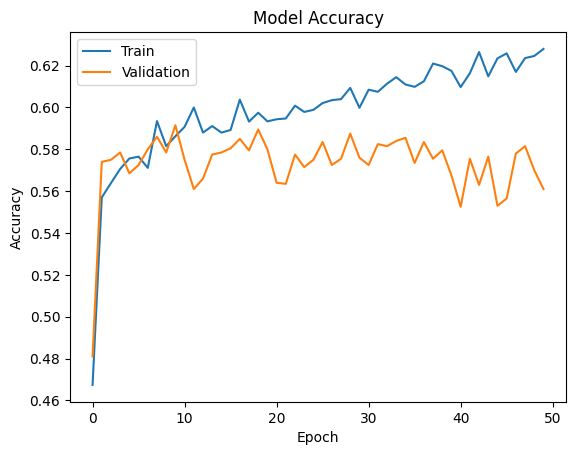

In [33]:
plot_accuracy(history_second)

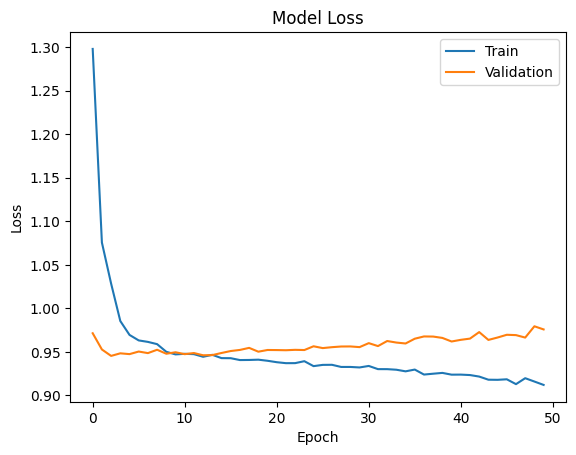

In [34]:
plot_loss(history_first)

In [35]:
loss, accuracy = model_second.evaluate(X_test_second, y_test_second)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

63/63 [==============================] - 0s 6ms/step - loss: 0.6427 - accuracy: 0.5610
Test Loss: 0.6427
Test Accuracy: 0.5610


In [36]:
y_pred_second = model_second.predict(X_test_second)
y_pred_classes_second = np.argmax(y_pred_second, axis=1)
y_true_second = np.argmax(y_test_second, axis=1)

63/63 [==============================] - 0s 4ms/step


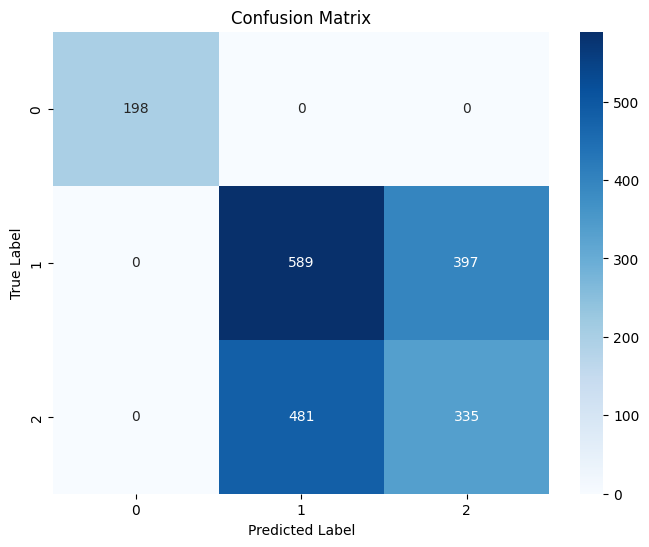

In [37]:
confusion_matrix_plot(y_true_second, y_pred_classes_second)

In [38]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

y_resampled.value_counts()

Outcome
1    4931
2    4931
0    4931
Name: count, dtype: int64

In [39]:
y_resampled_cat = to_categorical(y_resampled, num_classes=3)

print(pd.Series(y_resampled).value_counts())

Outcome
1    4931
2    4931
0    4931
Name: count, dtype: int64


In [40]:
X_train_third, X_test_third, y_train_third, y_test_third = train_test_split(X_resampled, y_resampled_cat, test_size=0.2, random_state=0, stratify=y_resampled_cat)

In [41]:
model_third = build_model(input_dim=(X_train_third.shape[1],))

In [42]:
history_third = model_third.fit(X_train_third,
                                y_train_third,
                                epochs=50,
                                batch_size=64,
                                validation_data=(X_test_third, y_test_third))

Epoch 1/50
185/185 [==============================] - 4s 13ms/step - loss: 0.7029 - accuracy: 0.6244 - val_loss: 0.6108 - val_accuracy: 0.6499
Epoch 2/50
185/185 [==============================] - 2s 12ms/step - loss: 0.5029 - accuracy: 0.6727 - val_loss: 0.4640 - val_accuracy: 0.6749
Epoch 3/50
185/185 [==============================] - 2s 13ms/step - loss: 0.4806 - accuracy: 0.6735 - val_loss: 0.4632 - val_accuracy: 0.6722
Epoch 4/50
185/185 [==============================] - 2s 13ms/step - loss: 0.4732 - accuracy: 0.6753 - val_loss: 0.4634 - val_accuracy: 0.6796
Epoch 5/50
185/185 [==============================] - 4s 20ms/step - loss: 0.4685 - accuracy: 0.6788 - val_loss: 0.4641 - val_accuracy: 0.6749
Epoch 6/50
185/185 [==============================] - 3s 18ms/step - loss: 0.4666 - accuracy: 0.6681 - val_loss: 0.4618 - val_accuracy: 0.6776
Epoch 7/50
185/185 [==============================] - 3s 15ms/step - loss: 0.4649 - accuracy: 0.6777 - val_loss: 0.4627 - val_accuracy: 0.6877

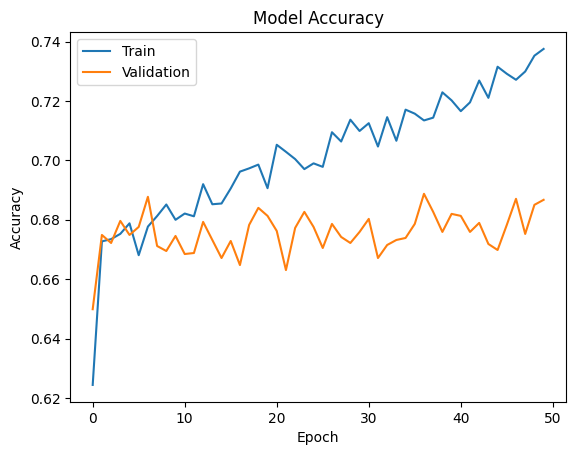

In [43]:
plot_accuracy(history_third)

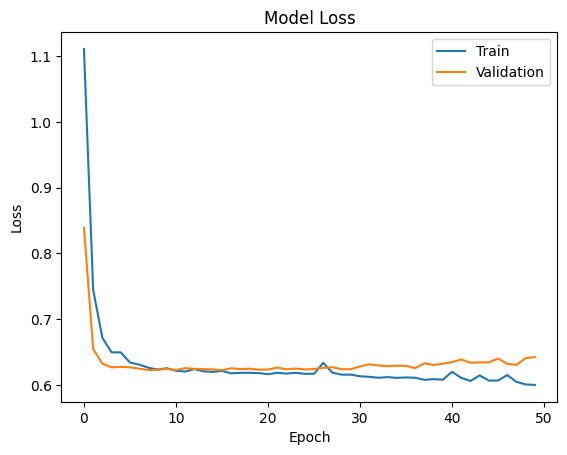

In [44]:
plot_loss(history_second)

In [45]:
loss, accuracy = model_third.evaluate(X_test_third, y_test_third)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

93/93 [==============================] - 0s 5ms/step - loss: 0.4730 - accuracy: 0.6867
Test Loss: 0.4730
Test Accuracy: 0.6867


In [46]:
y_pred_third = model_third.predict(X_test_third)
y_pred_classes_third = np.argmax(y_pred_third, axis=1)
y_true_third = np.argmax(y_test_third, axis=1)

93/93 [==============================] - 0s 3ms/step


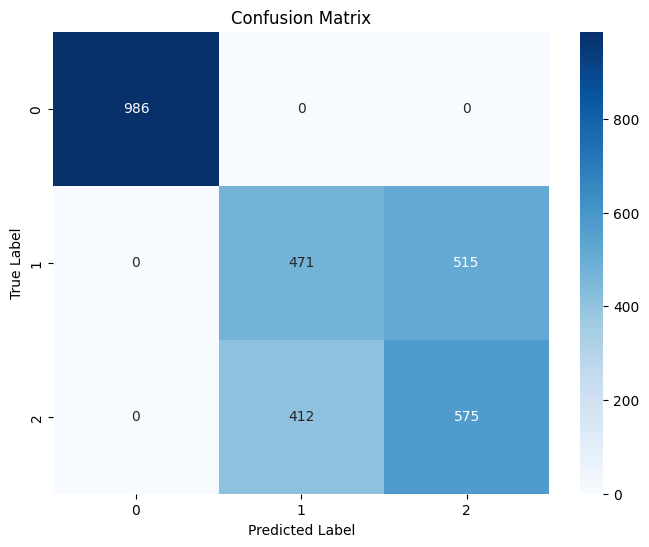

In [47]:
confusion_matrix_plot(y_true_third, y_pred_classes_third)